# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [91]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import pandas as pd
from config import weather_api_key, g_key
# to generate list of cities
from citipy import citipy
# to generate random coordinates
import random
# to get today's date
import datetime

## Generate Cities List

In [72]:
# Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
# Longitude values are measured relative to the prime meridian. They range from -180° when traveling west to 180° when traveling east. 


seed(1)
coordinates = []
# generate a list of paired integers, to act as coordinates
# note range is higher than 500 to account for duplicate cities, and cities not in google places
for _ in range(1500):
    coordinates.append([random.uniform(-90, 90), random.uniform(-180, 180)])


# get citypy corresponding to those coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

# get city name for each citypy
cities_in = []
for city in cities:
    cities_in.append(city.city_name)
   



In [73]:
# test for unique number of cities generated
test = pd.DataFrame(cities_in).nunique()
test

0    613
dtype: int64

In [74]:
# remove duplicate cities 
cities_in = list(set(cities_in))
len(cities_in)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [79]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [99]:
# set up lists to hold reponse info
cities_out = []
lat = []
lon = []
temp_max = []
humid = []
cloud = []
wind = []
country = []
date_accessed = []


# Loop through the list of cities and perform a request for data on each
for count, city in enumerate(cities_in):
    response = requests.get(query_url + city).json()
    request_date = date.today().strftime('%d-%m-%Y')
    
    # try and retrieve weather data for each city
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date_accessed.append(datetime.datetime.fromtimestamp(response['dt']).strftime('%d-%m-%Y'))
        cities_out.append(city)

        print(f"Processing Record {count} | {city}")
        
    # exception for cities not in list
    except:
        print("City not found.  Skipping...")

Processing Record 0 | falmouth
Processing Record 1 | bezhanitsy
Processing Record 2 | hami
Processing Record 3 | chokurdakh
Processing Record 4 | alyangula
Processing Record 5 | saint-denis
Processing Record 6 | palmas
Processing Record 7 | twentynine palms
City not found.  Skipping...
Processing Record 9 | paamiut
City not found.  Skipping...
Processing Record 11 | salihorsk
Processing Record 12 | ous
Processing Record 13 | vanavara
Processing Record 14 | katangli
Processing Record 15 | port hardy
Processing Record 16 | ossora
Processing Record 17 | redmond
Processing Record 18 | mar del plata
Processing Record 19 | pareora
Processing Record 20 | broken hill
Processing Record 21 | holme
City not found.  Skipping...
Processing Record 23 | khatanga
Processing Record 24 | puerto carreno
Processing Record 25 | boueni
Processing Record 26 | lasa
Processing Record 27 | hoquiam
Processing Record 28 | keti bandar
Processing Record 29 | aranos
Processing Record 30 | college
Processing Record 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [101]:
# create a data frame from API data
weather_dict = {
    "city": cities_out,
    "country":country,
    "latitude": lat,
    "longitude":lon,
    "temp_max_F": temp_max,
    "humid":humid,
    "cloud":cloud,
    "wind_mph":wind,
    "date_accessed":date_accessed
}
weather_data = pd.DataFrame(weather_dict)
print(weather_data)

# export data to csv
weather_data.to_csv("weather_data.csv", index=False, header=True)

             city country  latitude  longitude  temp_max_F  humid  cloud  \
0        falmouth      GB   50.1544    -5.0711       83.30     85      0   
1      bezhanitsy      RU   56.9767    29.8907       67.15     45     94   
2            hami      CN   42.8000    93.4500       91.80     19     95   
3      chokurdakh      RU   70.6333   147.9167       44.78     78     42   
4       alyangula      AU  -13.8483   136.4192       68.43     71     16   
..            ...     ...       ...        ...         ...    ...    ...   
562        hwange      ZW  -18.3693    26.5019       80.55     16      5   
563       whyalla      AU  -33.0333   137.5833       49.89     53     90   
564        murgab      TM   37.4966    61.9714      105.67     14     75   
565  saint simons      US   31.1352   -81.3901       78.84     91     40   
566           eyl      SO    7.9803    49.8164       89.26     47    100   

     wind_mph date_accessed  
0        3.00    21-07-2021  
1        8.72    21-07-2021

In [102]:
weather_data.describe()

,latitude,longitude,temp_max_F,humid,cloud,wind_mph
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,19.902632,20.234888,71.834109,66.853616,55.656085,8.287055
std,33.032550,90.910754,14.779926,23.642166,40.884607,6.219765
min,-54.800000,-175.200000,28.060000,5.000000,0.000000,0.000000
25%,-8.167500,-57.700350,61.330000,52.500000,10.500000,3.670000
50%,22.285500,25.678000,74.640000,73.000000,72.000000,6.890000
75%,49.252650,102.389850,82.400000,86.000000,100.000000,11.430000
max,78.218600,179.316700,118.670000,100.000000,100.000000,52.900000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Weather Components Plot

In [104]:
# Create dictionary of plot titles and y-axis labels
# note:  keys for this dictionary need to match column titles in weather_data
plot_labels = {'temp_max_F': ['Maximum Temperature vs Latitude','Maximum Temperature (deg F)'], 
                'humid': ['Humidity vs Latitude','Humidity (%)'], 
                'cloud': ['Cloudiness vs Latitude','Cloudiness (%)'], 
                'wind_mph': ['Wind Speed vs Latitude','Wind Speed (mph)']
                }

# note:  plots listed in plot_list need to be one of the keys in plot_labels
plot_list = ['temp_max_F', 'humid', 'cloud', 'wind_mph']



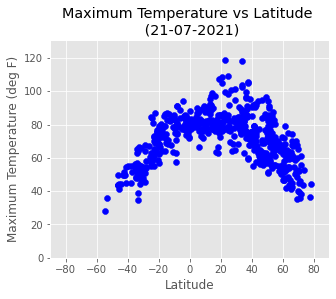

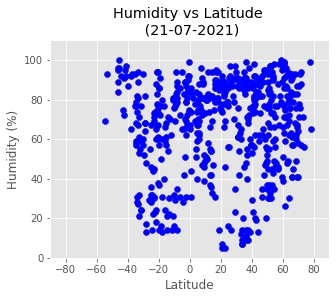

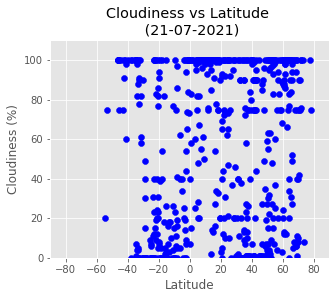

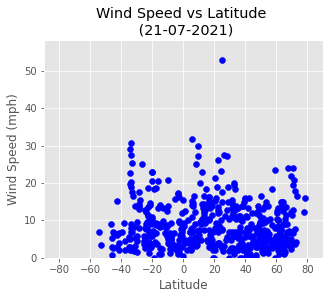

In [133]:
# Loop through weather components and create scatter plots
for plot in plot_list:
    fig, ax = plt.subplots()
    
    x_values = weather_data["latitude"]
    y_values = weather_data.loc[:, plot]

    ax.scatter(x_values,y_values, marker = "o", color = 'b')

    ax.set_xlim(-90,90)
    ax.set_ylim(0, y_values.max() * 1.1)
    
    ax.set_title(f'{plot_labels[plot][0]} \n ({request_date})')
    ax.set_xlabel("Latitude")
    ax.set_ylabel(plot_labels[plot][1])

    plt.style.use("ggplot")

    fig.set_size_inches([5,4])
    fig.savefig(f'plot_lat_v_{plot}.png', quality = 50, dpi= 300)

    plt.show()



## Normalised Distribution Plots

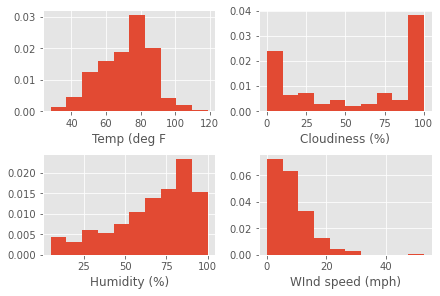

In [129]:
# Cloudiness data seems to be concentrated at the bottom and top of the graph
# examine the distribution of cloudiness
# then go on to compare with the distribution of other weather components

fig, ax = plt.subplots(2,2,constrained_layout=True)

ax[0,0].hist(weather_data['temp_max_F'], density = True)
ax[0,0].set_xlabel("Temp (deg F")

ax[0,1].hist(weather_data['cloud'], density = True)
ax[0,1].set_xlabel("Cloudiness (%)")

ax[1,0].hist(weather_data['humid'], density = True)
ax[1,0].set_xlabel("Humidity (%)")

ax[1,1].hist(weather_data['wind_mph'], density = True)
ax[1,1].set_xlabel("WInd speed (mph)")

plt.show()



## Observations of Weather Data

1.  Temperature v Latitude

    There appears to be a correlation between latitude and temperature.  In the southern hempisphere, temperature increases as latitude increases (i.e. approaches the equator).  In the northern hemisphere, temperature decreases as latitude decreases (i.e. moves away from the equator).  This is to be expected.  The turning point (the point at which temperature stops going up and starts coming down) does not appear to occur exactly on the equator (latitude = 0), which may be as a result of the earth's tilt relative to the sun.  The spread of data indicates that latitude is not the only factor affecting temperature.  Other factors to consider may include land mass / water mass and the level of forestation.


2.  Humidity v Latitude

    The data indicates that there is little correlation between humidity and latitude.  This may seem counter-intuitive, because tropical places near the equator are perceived as being areas of high humidity.  In order to make sense of this, it is necessary to understand the measure of humidity.  When humidity data is given as a percentage (as it is here), it is a measure of relative humidity, relative to the total amount of moisture that could be held by the air.  The amount of moisture that can be held by the air is strongly dependent on the temperature of the air.  Simplistically, air with 100 % humidty at 18 deg C holds a lot less moisture that air with 100 % humidity at 31 deg C.  This is why tropical climates feel more humid; there is more moisture in the air.  To determine if there is a correlation between latitude and humidity, it would be better to look at absolute humidity rather than relative humidity.


3.  Cloudiness v Latitude

    The data indicates that there is little correlation between cloudiness and latitude. It may be that other factors are more important than latitude eg land features, land / water mass.  It also may be that cloudiness is measured at a particular time of day, whereas in some climates, the clouds build up over the course of the day and then dissipate as rain falls.  More information as to how cloudiness is calculated and whether or not it takes into consideration the whole of the day is needed.  A look at the distribution of cloudiness values show a higher concentration at 0% cloudiness and 100% cloudiness than for the values in between.  This data is probably best interpreted in conjuction with rainfall data, which was not collected as part of this data set.

    

4.  Wind Speed v Latitude

    There appears to be little correlation between wind speed and latitude.  


## Linear Regression, Northern Hemisphere

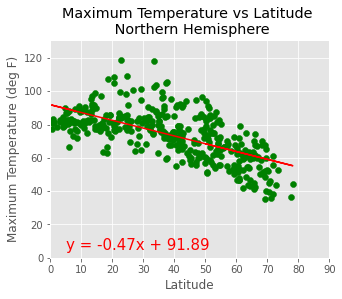

The correlation between latitude and Maximum Temperature (deg F) in the Northern Hemisphere is r-squared = 0.4216


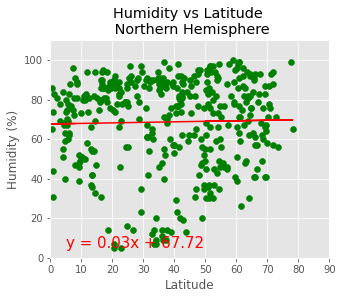

The correlation between latitude and Humidity (%) in the Northern Hemisphere is r-squared = 0.0006


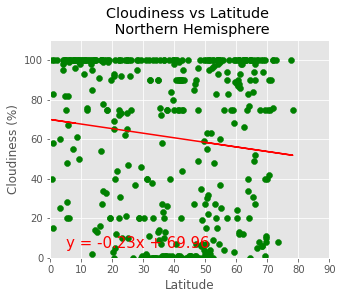

The correlation between latitude and Cloudiness (%) in the Northern Hemisphere is r-squared = 0.014


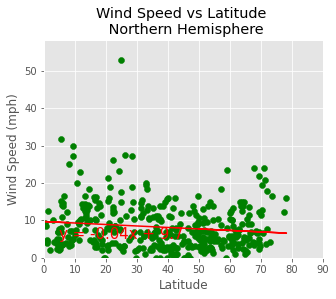

The correlation between latitude and Wind Speed (mph) in the Northern Hemisphere is r-squared = 0.0167


In [136]:
# loop through each of the plots, calculating the regression
for plot in plot_list:
    fig, ax = plt.subplots()
    
    x_values = weather_data.loc[weather_data["latitude"]>0]["latitude"]
    y_values = weather_data.loc[weather_data["latitude"]>0, plot]
    ax.scatter(x_values,y_values, marker = "o", color = 'g')

    ax.set_xlim(0,90)
    ax.set_ylim(0, y_values.max() * 1.1)
    
    ax.set_title(f"{plot_labels[plot][0]} \n Northern Hemisphere")
    ax.set_xlabel("Latitude")
    ax.set_ylabel(plot_labels[plot][1])

    # add linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.plot(x_values,regress_values,"r-")
    ax.annotate(line_eq,(5,5),fontsize=15,color="red")
    
    plt.style.use("ggplot")

    fig.set_size_inches([5,4])
    fig.savefig(f'plot_regress_N_{plot}.png', quality = 50, dpi= 300)

    plt.show()

    # print correlation
    print(f"The correlation between latitude and {plot_labels[plot][1]} in the Northern Hemisphere is r-squared = {round(rvalue**2, 4)}")



## Linear Regression, Souththern Hemisphere

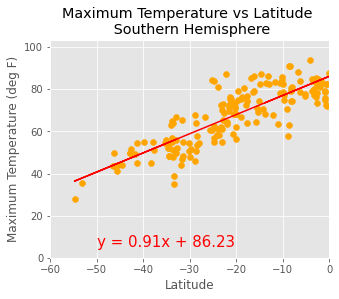

The correlation between latitude and Maximum Temperature (deg F) in the Southern Hemisphere is r-squared = 0.7085


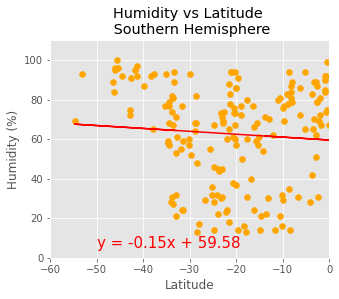

The correlation between latitude and Humidity (%) in the Southern Hemisphere is r-squared = 0.0058


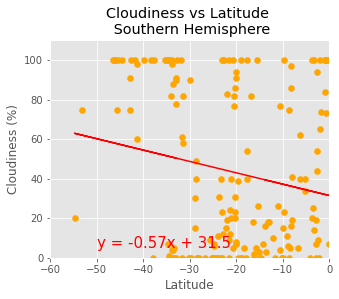

The correlation between latitude and Cloudiness (%) in the Southern Hemisphere is r-squared = 0.0331


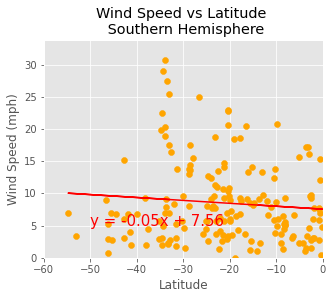

The correlation between latitude and Wind Speed (mph) in the Southern Hemisphere is r-squared = 0.0089


In [137]:
for plot in plot_list:
    fig, ax = plt.subplots()
    
    x_values = weather_data.loc[weather_data["latitude"]<0]["latitude"]
    y_values = weather_data.loc[weather_data["latitude"]<0, plot]
    ax.scatter(x_values,y_values, marker = "o", color = 'orange')

    ax.set_xlim(-60, 0)
    ax.set_ylim(0, y_values.max() * 1.1)
    
    ax.set_title(f"{plot_labels[plot][0]} \n Southern Hemisphere")
    ax.set_xlabel("Latitude")
    ax.set_ylabel(plot_labels[plot][1])

    # add linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.plot(x_values,regress_values,"r-")
    ax.annotate(line_eq,(-50,5),fontsize=15,color="red")
    
    plt.style.use("ggplot")

    fig.set_size_inches([5,4])
    fig.savefig(f'plot_regress_S_{plot}.png', quality = 50, dpi= 300)

    plt.show()

    # print correlation
    print(f"The correlation between latitude and {plot_labels[plot][1]} in the Southern Hemisphere is r-squared = {round(rvalue**2, 4)}")
